Data that I found that showing top watched netflix shows and movies and their genre divided years into 2 parts: first 6 months(Jan-Jun) and las 6 months(Jul-Dec). I had to prepare an excel file to gather inflation rate and unemployment rate and their sum which is misery Index for each country and for each 6 months starting from 2023 to 2025 (first 6 months of 2025). I got the economic data from a website called Trading Economics for Turkey, Italy and US.

Economic Context & Hypothesized Impact

Turkey (The Volatility Case):

Observation: Exhibits a massive spike in the Misery Index, peaking at 78.27 in H1 2024.

Implication: This period is expected to show the strongest correlation with 'Escapist' viewing, testing the upper limits of the Lipstick Effect.

United States (The Control Group):

Observation: Maintains a stable and low index (~7.0).

Implication: Serves as a baseline; significant genre shifts here would likely stem from industry trends rather than economic distress.

Italy (The Recovery Case):

Observation: Shows a consistent improvement (Disinflation), dropping from 15.94 to 7.98.

Implication: Tests the reverse hypothesis—whether improved economic conditions lead to a decline in comedy/fantasy consumption in favor of serious drama.

ESCAPIST GENRES-> Comedy, Fantasy, Sci-Fi, Adventure / Action, Romance
REALIST GENRES-> Drama, Crime, Thriller, Horror, War, Documentary, Biography / History

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")

# 1. economy
# 
df_eco = pd.read_csv('economics_data2.csv', sep=';', decimal=',')

# 2. Film 
df_movies = pd.read_csv('tr.list.csv', sep=';')

#  Year to string
df_eco['Year'] = df_eco['Year'].astype(str)
df_movies['Year'] = df_movies['Year'].astype(str)

# control print
print("economy data is ready.")
print("Film data is ready.")

economy data is ready.
Film data is ready.


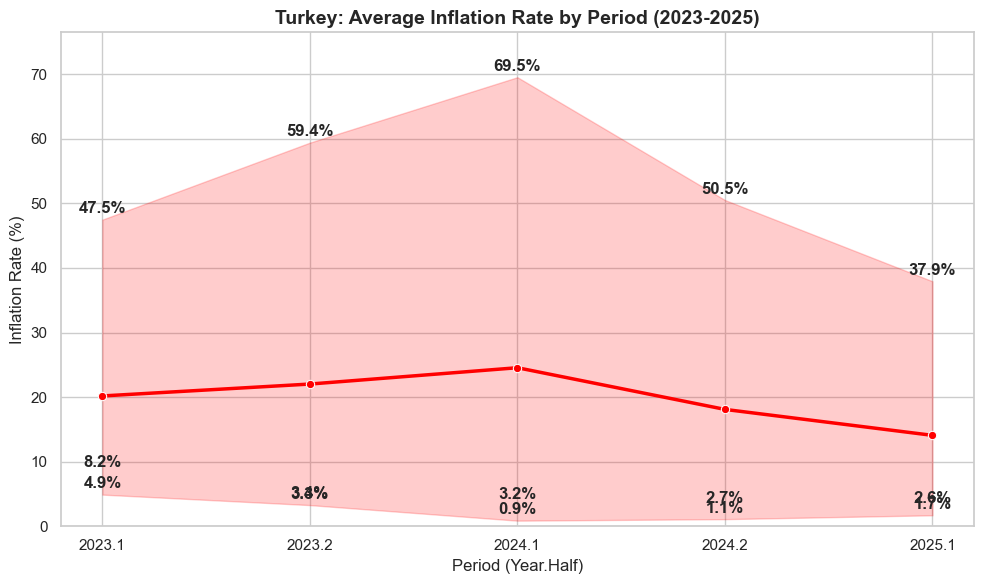

In [ ]:

plt.figure(figsize=(10, 6))

#Line Plot
sns.lineplot(data=df_eco, x='Year', y='Tot_mean_infrate', marker='o', linewidth=2.5, color='red')


plt.title('Turkey: Average Inflation Rate by Period (2023-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Period (Year.Half)', fontsize=12)
plt.ylabel('Inflation Rate (%)', fontsize=12)
plt.ylim(0, df_eco['Tot_mean_infrate'].max() * 1.1) # Y eksenini biraz genişletelim


for x, y in zip(df_eco['Year'], df_eco['Tot_mean_infrate']):
    plt.text(x, y+1, f'{y:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

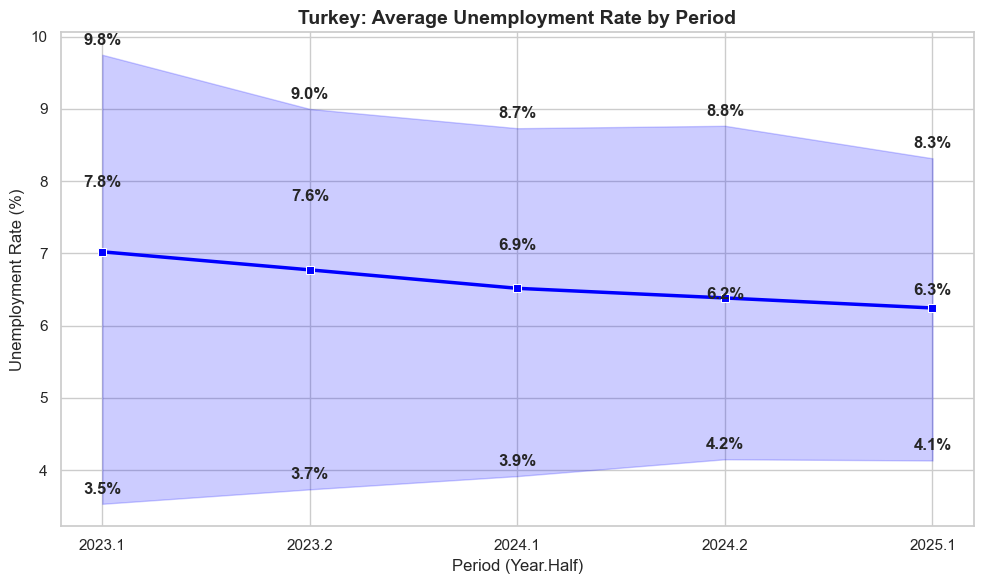

In [3]:
# Grafik Boyutu
plt.figure(figsize=(10, 6))

# Çizgi Grafik
sns.lineplot(data=df_eco, x='Year', y='Tot_mean_unemprate', marker='s', linewidth=2.5, color='blue')

# Etiketler (İngilizce)
plt.title('Turkey: Average Unemployment Rate by Period', fontsize=14, fontweight='bold')
plt.xlabel('Period (Year.Half)', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)

# Değerleri yazdırma
for x, y in zip(df_eco['Year'], df_eco['Tot_mean_unemprate']):
    plt.text(x, y+0.1, f'{y:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

/var/folders/sz/3b7fjs9j6p73blb108dtw0_m0000gn/T/ipykernel_74969/367565644.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}M'.format(x/1000000) for x in current_values])


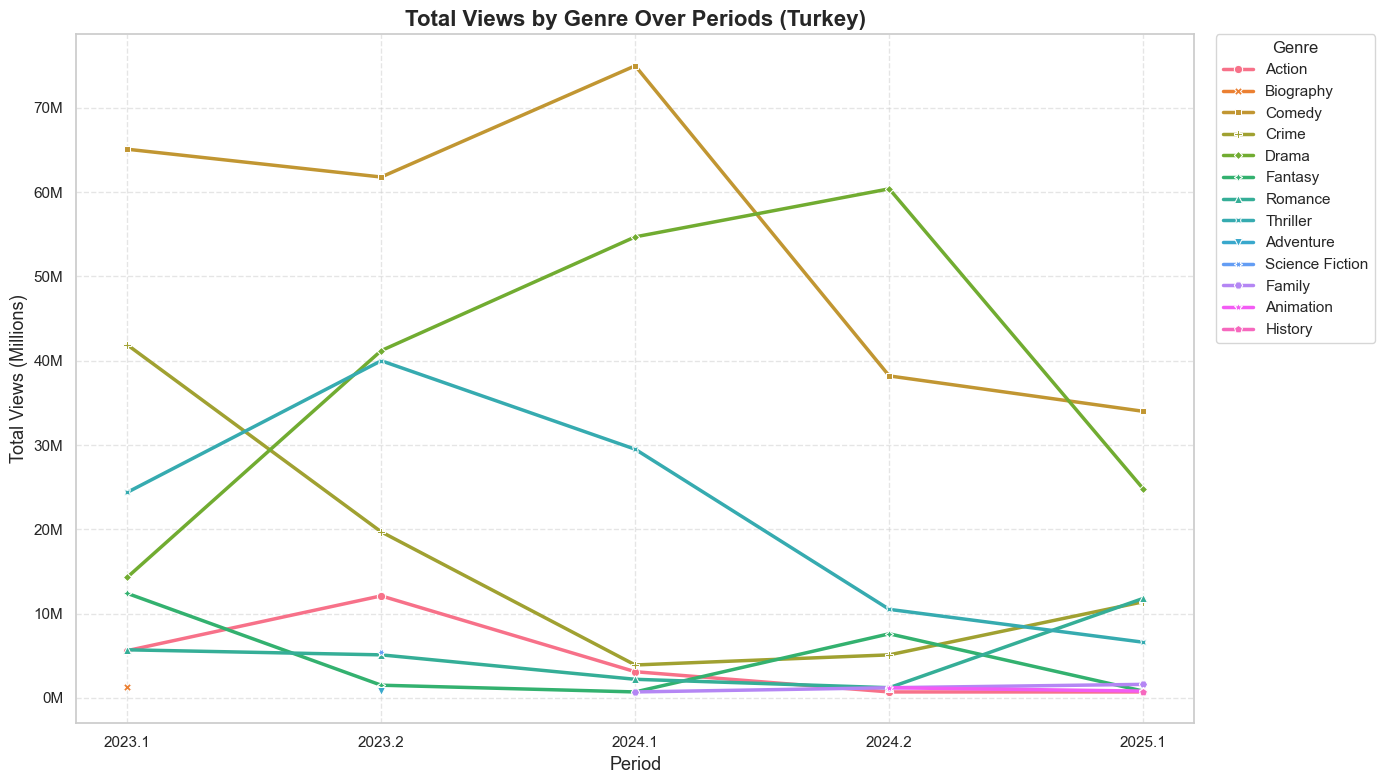

In [5]:
# 1. Veriyi Gruplama: Her dönem ve tür için toplam izlenmeyi hesaplayalım
all_genres_summary = df_movies.groupby(['Year', 'Genre'])['Views'].sum().reset_index()

# 2. Grafik Ayarları
plt.figure(figsize=(14, 8)) # Legend sığsın diye genişliği artırdık

# 3. Çizgi Grafik Oluşturma
# hue='Genre' diyerek her tür için ayrı bir renk atıyoruz
sns.lineplot(data=all_genres_summary, x='Year', y='Views', hue='Genre', 
             style='Genre', # Çizgi stillerini de değiştirerek ayırt etmeyi kolaylaştıralım
             markers=True, dashes=False, linewidth=2.5)

# 4. İngilizce Etiketler ve Düzenlemeler
plt.title('Total Views by Genre Over Periods (Turkey)', fontsize=16, fontweight='bold')
plt.xlabel('Period', fontsize=13)
plt.ylabel('Total Views (Millions)', fontsize=13)

# Y Eksenini Milyon (M) formatına çevirme
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}M'.format(x/1000000) for x in current_values])

# Legend'ı grafiğin dışına alalım ki çizgileri kapatmasın
plt.legend(title='Genre', title_fontsize='12', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

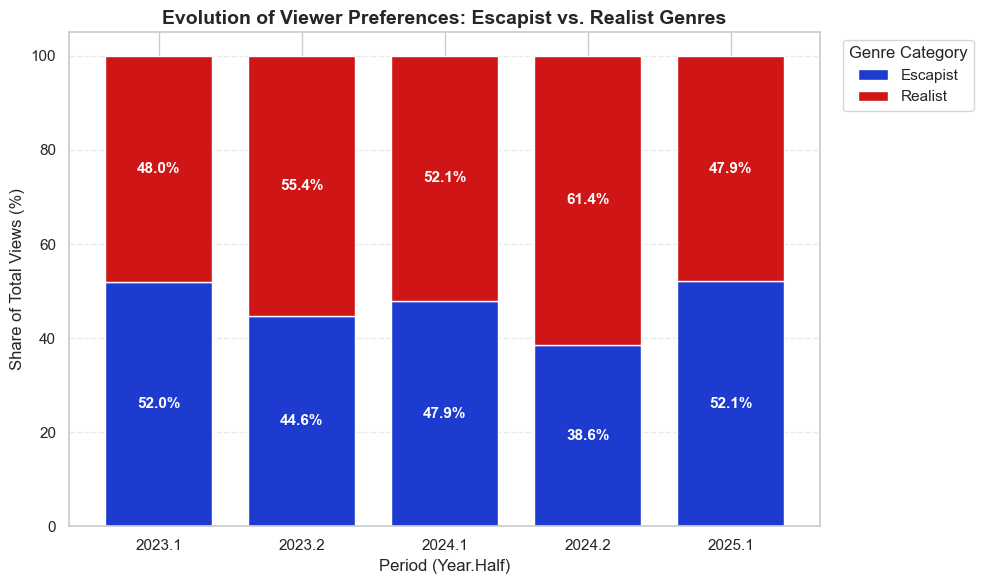

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Loading & Preprocessing ---
# Loading the movie dataset
df_movies = pd.read_csv('tr.list.csv', sep=';')
# Converting 'Year' to string to treat it as a categorical period (e.g., "2023.1")
df_movies['Year'] = df_movies['Year'].astype(str)

# --- 2. Defining Genre Categories ---
# We are testing the hypothesis: "Do people prefer escapism during economic downtime?"
escapist_genres = ['Comedy', 'Fantasy', 'Sci-Fi', 'Adventure', 'Action', 'Romance']
realist_genres  = ['Drama', 'Crime', 'Thriller', 'Horror', 'War', 'Documentary', 'Biography', 'History']

def classify_genre(genre_name):
    """
    Classifies a movie genre into 'Escapist' or 'Realist'.
    Returns 'Other' if the genre is not in the predefined lists.
    """
    genre_clean = genre_name.strip()
    if genre_clean in escapist_genres:
        return 'Escapist'
    elif genre_clean in realist_genres:
        return 'Realist'
    else:
        return 'Other'

# Applying the classification
df_movies['Category'] = df_movies['Genre'].apply(classify_genre)

# Filtering out 'Other' to focus on the binary comparison
df_analysis = df_movies[df_movies['Category'] != 'Other'].copy()

# --- 3. Data Aggregation for Visualization ---
# Grouping by Period and Category to get total views
grouped_data = df_analysis.groupby(['Year', 'Category'])['Views'].sum().unstack()

# Calculating the Percentage Share (Normalizing to 100%)
# This shows the relative preference shift, independent of total market volume
grouped_pct = grouped_data.div(grouped_data.sum(1), axis=0) * 100

# --- 4. Visualization: 100% Stacked Bar Chart ---
plt.figure(figsize=(12, 7))

# Plotting
# Colors: Blue for Escapist , REd for Realist 
colors = ["#1D3BCF", "#CF1515"] 
ax = grouped_pct.plot(kind='bar', stacked=True, color=colors, width=0.75, figsize=(10, 6))

# Titles and Labels (English Terminology)
plt.title('Evolution of Viewer Preferences: Escapist vs. Realist Genres', fontsize=14, fontweight='bold')
plt.xlabel('Period (Year.Half)', fontsize=12)
plt.ylabel('Share of Total Views (%)', fontsize=12)
plt.xticks(rotation=0) # Keep x-axis labels horizontal for readability

# Legend Configuration
plt.legend(title='Genre Category', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Adding Percentage Labels inside the bars
for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%', label_type='center', color='white', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

--- Analysis Data Preview ---
      Year  Misery_Index  Escapist_Share
0   2023.1     57.226500        0.520275
1   2023.2     68.402667        0.446213
2   2024.1     78.267833        0.479007
3   2024.2     59.281667        0.385610
4   2025.1     46.248333        0.520925
5   2023.1      8.433333        0.520275
6   2023.2      7.116667        0.446213
7   2024.1      7.166667        0.479007
8   2024.2      6.816667        0.385610
9   2025.1      6.733333        0.520925
10  2023.1     15.938333        0.520275
11  2023.2     10.860000        0.446213
12  2024.1      7.766667        0.479007
13  2024.2      7.333333        0.385610
14  2025.1      7.983333        0.520925


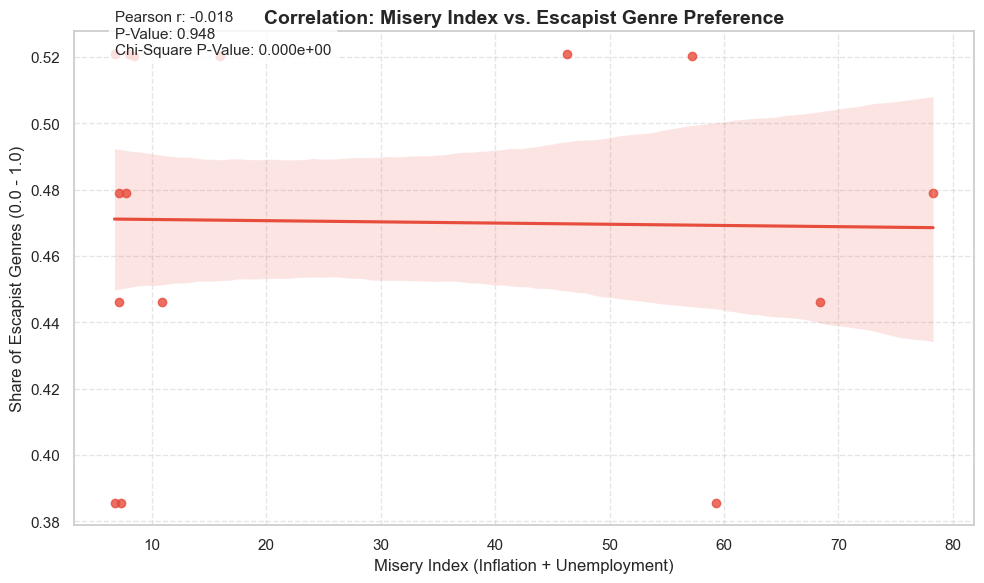


--- Statistical Test Results ---
1. Pearson Correlation (Misery vs Escapism): r=-0.0185, p=0.9478
2. Chi-Square Test (Period Independence): p=0.0000e+00


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# --- 1. Data Preparation ---
# Load datasets
df_movies = pd.read_csv('tr.list.csv', sep=';')
df_eco = pd.read_csv('economics_data2.csv', sep=';', decimal=',')

# Convert Year to string for merging
df_movies['Year'] = df_movies['Year'].astype(str)
df_eco['Year'] = df_eco['Year'].astype(str)

# Genre Categorization Logic
escapist_genres = ['Comedy', 'Fantasy', 'Sci-Fi', 'Adventure', 'Action', 'Romance']
realist_genres  = ['Drama', 'Crime', 'Thriller', 'Horror', 'War', 'Documentary', 'Biography', 'History']

def classify_genre(genre):
    g = genre.strip()
    if g in escapist_genres: return 'Escapist'
    elif g in realist_genres: return 'Realist'
    else: return 'Other'

df_movies['Category'] = df_movies['Genre'].apply(classify_genre)
df_analysis = df_movies[df_movies['Category'] != 'Other']

# --- 2. Calculating Escapist Share per Period ---
# Sum views by Year and Category
genre_stats = df_analysis.groupby(['Year', 'Category'])['Views'].sum().unstack()

# Calculate total and shares
genre_stats['Total'] = genre_stats['Escapist'] + genre_stats['Realist']
genre_stats['Escapist_Share'] = genre_stats['Escapist'] / genre_stats['Total']
genre_stats.reset_index(inplace=True)

# --- 3. Merging with Economic Data (Misery Index) ---
# Ensure Misery_Index is float (handle potential string formatting issues)
if df_eco['Misery_Index'].dtype == 'O': 
    df_eco['Misery_Index'] = df_eco['Misery_Index'].str.replace(',', '.').astype(float)

final_data = pd.merge(df_eco[['Year', 'Misery_Index']], genre_stats, on='Year')

print("--- Analysis Data Preview ---")
print(final_data[['Year', 'Misery_Index', 'Escapist_Share']])

# --- 4. Statistical Tests ---

# A. Pearson Correlation Test
# H0: There is no linear relationship between Misery Index and Escapist Share.
corr_coef, p_value_corr = stats.pearsonr(final_data['Misery_Index'], final_data['Escapist_Share'])

# B. Chi-Square Test of Independence
# H0: Genre preference (Escapist vs Realist) is independent of the Period.
# We use the raw view counts for the contingency table
contingency_table = genre_stats[['Escapist', 'Realist']].values
chi2, p_value_chi, dof, expected = stats.chi2_contingency(contingency_table)

# --- 5. Visualization: Regression Plot ---
plt.figure(figsize=(10, 6))
sns.regplot(data=final_data, x='Misery_Index', y='Escapist_Share', ci=80, color='#e74c3c')

# Annotating Statistics on Plot
plt.title(f'Correlation: Misery Index vs. Escapist Genre Preference', fontsize=14, fontweight='bold')
plt.xlabel('Misery Index (Inflation + Unemployment)', fontsize=12)
plt.ylabel('Share of Escapist Genres (0.0 - 1.0)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Text Box for Stats
stats_text = (f'Pearson r: {corr_coef:.3f}\n'
              f'P-Value: {p_value_corr:.3f}\n'
              f'Chi-Square P-Value: {p_value_chi:.3e}')
plt.text(final_data['Misery_Index'].min(), final_data['Escapist_Share'].max(), 
         stats_text, fontsize=11, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# --- 6. Text Output for Interpretation ---
print("\n--- Statistical Test Results ---")
print(f"1. Pearson Correlation (Misery vs Escapism): r={corr_coef:.4f}, p={p_value_corr:.4f}")
print(f"2. Chi-Square Test (Period Independence): p={p_value_chi:.4e}")

Interpretation of Statistical Test Results

1. Chi-Square Test of Independence

Result: χ 
2
  test yielded a p-value of 0.000 (p<0.05).

Interpretation:

"The result allows us to strongly reject the Null Hypothesis (H 
0
​	
 ), which stated that genre preferences are independent of the time period.

This confirms that the distribution of 'Escapist' vs. 'Realist' movie consumption is not random; there is a statistically significant structural shift in audience preferences between the periods of 2023, 2024, and 2025. The audience mood is fluctuating significantly, not staying static."

2. Pearson Correlation Test (Misery Index vs. Escapist Share)

Result: Pearson correlation coefficient (r) is −0.018 with a p-value of 0.948.

Interpretation:

"Here, we fail to reject the Null Hypothesis (H0). The p-value (0.948) is well above the significance threshold of 0.05, and the coefficient (r≈0) indicates no linear correlation.

Key Finding: While the Chi-Square test proves that preferences did change, this change cannot be explained linearly by the Misery Index (Inflation + Unemployment). Contrary to the popular 'Escapism Theory,' economic distress did not drive Turkish audiences directly toward comedy or fantasy genres during this period."

Okay I guess Turkish people love comedy and drama a lot so their genre choices does not change with economic regressions. 

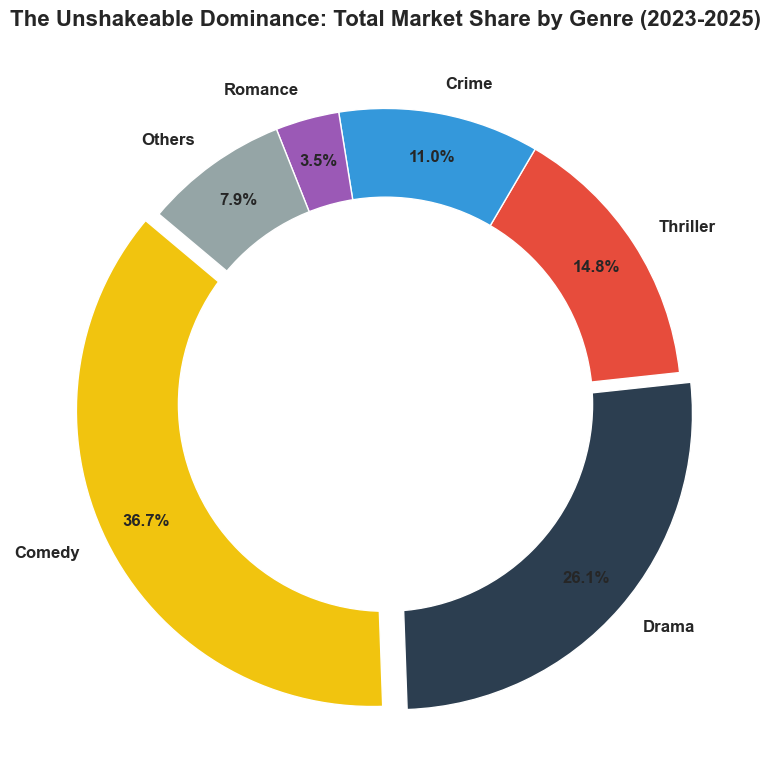

--- NUMBERS ---
Comedy      274100000
Drama       195400000
Thriller    110979000
Crime        82000000
Romance      26000000
Others       58900000
dtype: int64


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_movies = pd.read_csv('tr.list.csv', sep=';')


total_genre_views = df_movies.groupby('Genre')['Views'].sum().sort_values(ascending=False)


top_5 = total_genre_views.head(5)
others = pd.Series([total_genre_views[5:].sum()], index=['Others'])
final_data = pd.concat([top_5, others])


plt.figure(figsize=(10, 8))


colors = ['#f1c40f', '#2c3e50', '#e74c3c', '#3498db', '#9b59b6', '#95a5a6']
explode = (0.05, 0.05, 0, 0, 0, 0)  # İlk ikisini (Komedi ve Dram) pastadan hafif ayırarak vurgula

plt.pie(final_data, 
        labels=final_data.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors, 
        explode=explode, 
        textprops={'fontsize': 12, 'fontweight': 'bold'},
        pctdistance=0.85)

# k "Donut Chart"
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('The Unshakeable Dominance: Total Market Share by Genre (2023-2025)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("--- NUMBERS ---")
print(final_data)

Lets Look at Italy 